In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import numpy as np

tf.random.set_seed(13)

2023-03-05 15:13:23.645270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 15:13:23.882654: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 15:13:23.882713: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 15:13:24.961691: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [9]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


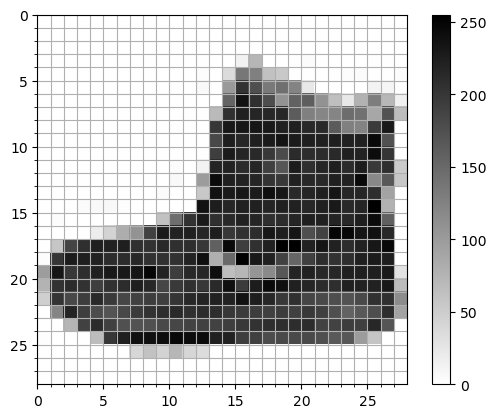

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.margins(0, 0)  
plt.imshow(train_images[0], 
           extent=(0, train_images[0].shape[0], train_images[0].shape[1], 0),
           cmap=plt.cm.binary)
plt.colorbar()
plt.xlim(0, 28)
plt.ylim(28, 0)
minor_ticks = np.arange(0, 28, 1)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')

In [13]:
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

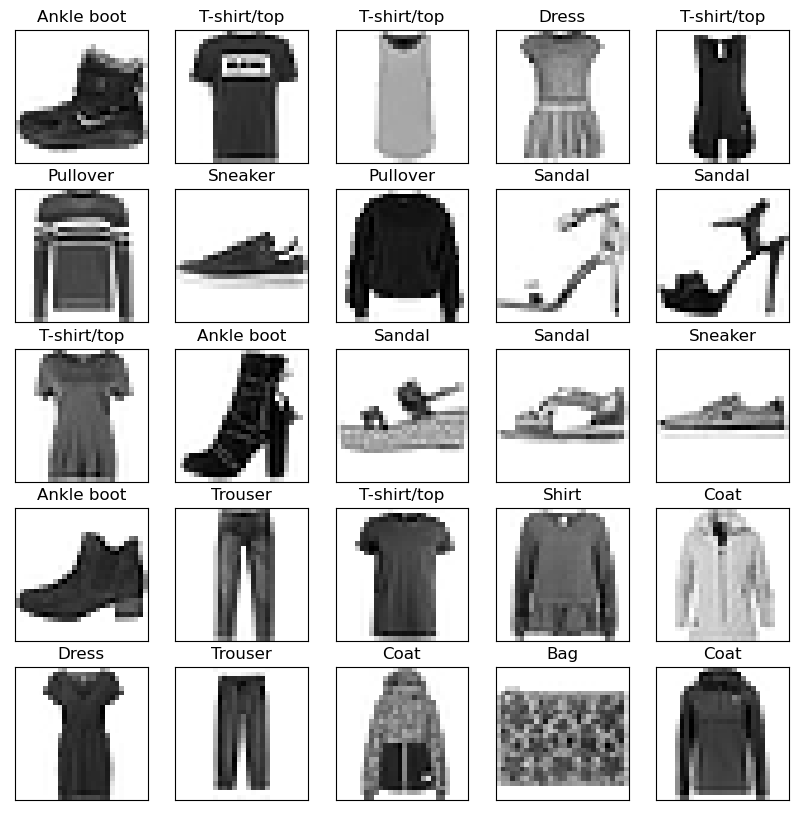

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[train_labels[i]])

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10)
])

2023-03-05 17:10:17.139503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 17:10:17.139540: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 17:10:17.139565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thomas-Lenovo-V15-G2-ALC): /proc/driver/nvidia/version does not exist
2023-03-05 17:10:17.139884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


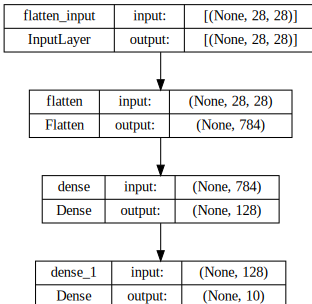

In [30]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [31]:
model.count_params()

101770

In [32]:
predictions = model(train_images[:1]).numpy()
print(predictions)
print('min =', np.min(predictions), 'max =', np.max(predictions), 'sum =', np.sum(predictions))

[[ 1.1127119   0.5413928   0.14284435 -0.7290772   0.31321043 -0.8449352
   0.9849722  -0.8586217  -0.17816952 -0.16029653]]
min = -0.8586217 max = 1.1127119 sum = 0.32403147


In [33]:
softmax_predictions = tf.nn.softmax(predictions).numpy()
print(softmax_predictions)
print('min =', np.min(softmax_predictions), 'max =', np.max(softmax_predictions), 'sum =', np.sum(softmax_predictions))

[[0.23432596 0.1323426  0.08884076 0.03714852 0.10534194 0.03308454
  0.20622616 0.03263481 0.06444626 0.06560846]]
min = 0.03263481 max = 0.23432596 sum = 1.0


In [34]:
model.compile(
    optimizer=optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='accuracy'
)

In [35]:
model.fit(train_images, train_labels, epochs=5)

2023-03-05 17:41:17.583969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4983 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8910


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accurace', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3601 - accuracy: 0.8711
Test accurace 0.8711000084877014


In [38]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [39]:
predictions[0]

array([6.8221275e-06, 2.7907904e-08, 1.3135574e-08, 3.4615418e-08,
       4.8724218e-08, 3.2973271e-02, 3.6343184e-07, 1.9136135e-02,
       2.1771015e-05, 9.4786137e-01], dtype=float32)

In [40]:
for i in predictions[0]:
    print(f'{i:f}')

0.000007
0.000000
0.000000
0.000000
0.000000
0.032973
0.000000
0.019136
0.000022
0.947861


In [43]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions, true_labels, img):
    predictions_array, true_label, img = predictions[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

In [46]:
def plot_value_array(i, predictions, true_labels, show_xticks=False):
    predictions_array, true_label = predictions[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    if show_xticks:
        plt.xticks(range(10), class_names, rotation='vertical')
    else:
        plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

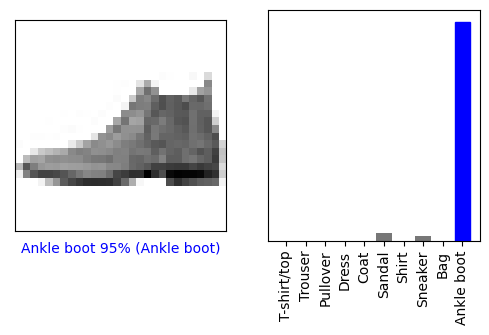

In [47]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(0, predictions, test_labels, True)

In [66]:
predicted_labels = np.apply_along_axis(np.argmax, 1, predictions)
print ('predicted labels :', predicted_labels)
misclassified = test_labels != predicted_labels
print('missclasifies: ', missclasifies)
misclassified_indices = np.argwhere(misclassified)
print('Misclassified Indeces:\n', misclassified_indices)
print('Number of misclassified:' , len(misclassified_indices))

predicted labels : [9 2 1 ... 8 1 5]
missclasifies:  [False False False ... False False False]
Misclassified Indeces:
 [[  12]
 [  17]
 [  23]
 ...
 [9977]
 [9979]
 [9989]]
Number of misclassified: 1289


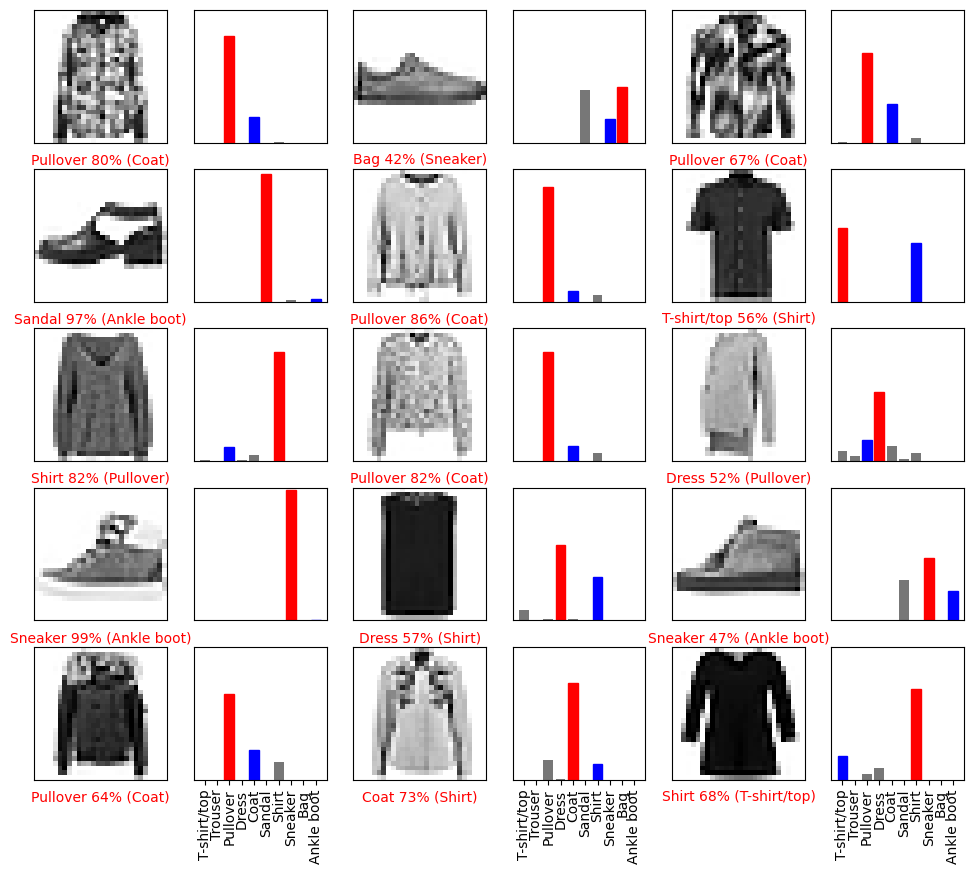

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

show_x_ticks = False
for i in range(num_images):
    if i >= num_images - num_cols:
        show_x_ticks = True
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(misclassified_indices[i-1][0], predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2*i+2)
    plot_value_array(misclassified_indices[i-1][0], predictions,  test_labels, show_x_ticks)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.78      0.95      0.86      1000
           4       0.78      0.77      0.77      1000
           5       0.97      0.96      0.96      1000
           6       0.71      0.63      0.67      1000
           7       0.92      0.96      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [69]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))

[[772   2  23  74   5   2 113   1   8   0]
 [  0 965   1  26   5   0   3   0   0   0]
 [  6   1 797  23  90   1  82   0   0   0]
 [  9   5  13 946  13   1  12   0   1   0]
 [  0   0 127  64 770   0  39   0   0   0]
 [  0   0   0   0   0 960   0  32   1   7]
 [ 90   1  98  68 102   1 634   0   6   0]
 [  0   0   0   0   0  13   0 965   1  21]
 [  4   1   8   8   5   3  10   5 956   0]
 [  0   0   0   0   0  10   1  43   0 946]]
